PROJECT OVERVIEW - TO DO THE SENTIMENT ANALYSIS OF THE INCEPTION MOVIE REVIEW DATASET. FINALLY FIND OUT WHETHER IT IS POSITIVE, NEGATIVE OR NEUTRAL. ALONG WITH THAT DOING SENTIMENT ANALYSIS ON DIFFERENT ASPECTS OF THE MOVIE AND ANALYSISING THOSE.

IMPORTING ALL THE NECECSSARY LIBRARIES

In [1]:
#for visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for pre-processing steps
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#for vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

#for sentiment analysis
from textblob import TextBlob

#for wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


IMPORTING THE DATASET

In [2]:
with open('/content/Inception.txt', 'r') as file:
  reviews = file.readlines()

  print("Sample data : ", reviews[:100])

Sample data :  ['\ufeffInception: A Masterpiece of Science Fiction and Psychological Exploration** \n', '"Inception" is a 2010 science fiction film directed and written by Christopher Nolan, known for his  complex and mind-bending narratives. The film stars Leonardo DiCaprio as Dom Cobb, a skilled  thief who specializes in the art of extraction, a process by which he enters the dreams of his targets  to steal valuable secrets from their subconscious. Cobb is haunted by the death of his wife, Mal  (played by Marion Cotillard), and is estranged from his children. His skills have made him a hot  commodity in the world of corporate espionage, but they have also cost him dearly, making him a  fugitive from the law. \n', 'The plot of "Inception" revolves around Cobb\'s attempt to pull off the ultimate heist: inception.  Instead of stealing an idea, Cobb and his team must plant one in the mind of Robert Fischer (Cillian  Murphy), the heir to a vast corporate empire. This mission is offered to

THIS FUNCTION CONTAINS ALL THE PRE-PRCOESSING STEPS LIKE - TOKENIZATION, LEMMATIZATION AND STOPWORDS REMOVAL. FINALLY THE TOKENS ARE JOINED BACK INTO A SENTENCE

In [3]:
def preprocess_text(line):
    # Tokenization
    tokens = word_tokenize(line.lower())

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))

    filtered_tokens = [token for token in lemmatized_tokens if token not in stop_words]

    # Join tokens back into a sentence
    return ' '.join(filtered_tokens)


PRE-PROCESSING STEPS ARE APPLIED ON THE DATASET LINE BY LINE

In [4]:
preprocessed_lines = [preprocess_text(line) for line in reviews]

TF-IDF VECTORIZATION TO FIND IMPORTANCE OF WORD IN THIS DOCUMENT

In [5]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_lines)

In [6]:
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

print("TF-IDF scores for the first document:")
for word, score in zip(feature_names, tfidf_scores[0]):
    print(f"{word}: {score}")

TF-IDF scores for the first document:
2010: 0.0
21st: 0.0
achieve: 0.0
across: 0.0
act: 0.0
action: 0.0
add: 0.0
also: 0.0
analyzed: 0.0
another: 0.0
arc: 0.0
architect: 0.0
ariadne: 0.0
around: 0.0
art: 0.0
arthur: 0.0
aspect: 0.0
assembles: 0.0
attempt: 0.0
audience: 0.0
battleground: 0.0
beautifully: 0.0
become: 0.0
bending: 0.0
blur: 0.0
boundary: 0.0
businessman: 0.0
cast: 0.0
cementing: 0.0
central: 0.0
century: 0.0
challenging: 0.0
character: 0.0
charged: 0.0
child: 0.0
christopher: 0.0
cillian: 0.0
cinema: 0.0
cinematic: 0.0
city: 0.0
clear: 0.0
climax: 0.0
cobb: 0.0
combined: 0.0
commodity: 0.0
complex: 0.0
complicating: 0.0
concept: 0.0
conclusion: 0.0
confront: 0.0
construct: 0.0
continue: 0.0
core: 0.0
corporate: 0.0
cost: 0.0
cotillard: 0.0
creating: 0.0
criminal: 0.0
critical: 0.0
crucial: 0.0
de: 0.0
dearly: 0.0
death: 0.0
deeply: 0.0
dicaprio: 0.0
differently: 0.0
dileep: 0.0
directed: 0.0
direction: 0.0
discussed: 0.0
distinct: 0.0
distortion: 0.0
dom: 0.0
dream: 0.0
d

BAR PLOT OF TOP 20 WORDS

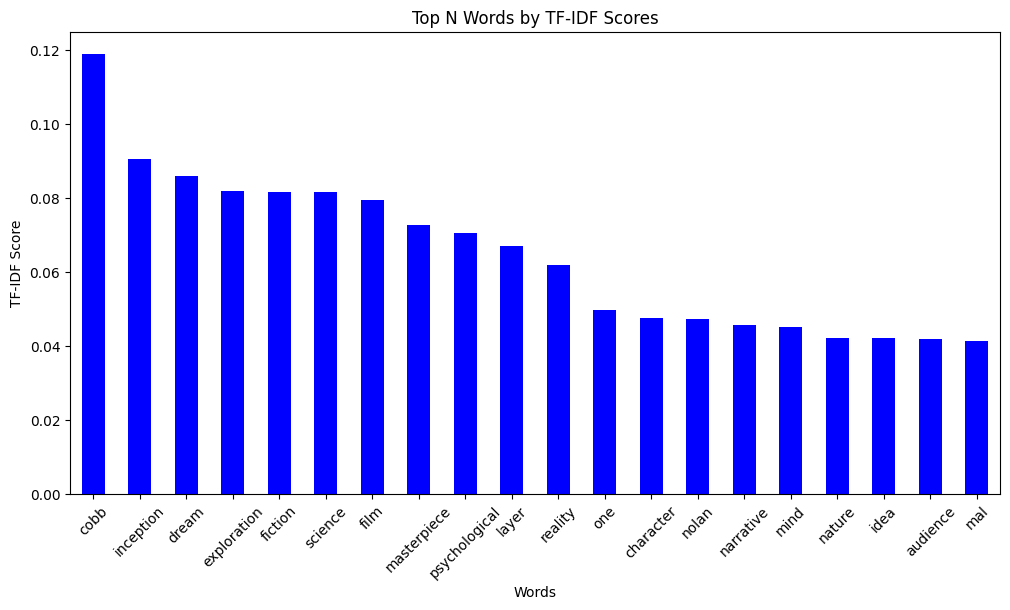

In [7]:
N = 20
tfidf_scores_df = pd.DataFrame(tfidf_scores, columns=feature_names)
top_n_words = tfidf_scores_df.mean(axis=0).sort_values(ascending=False).head(N)

# Bar plot of top N TF-IDF scores
plt.figure(figsize=(12, 6))
top_n_words.plot(kind='bar', color='blue')
plt.title('Top N Words by TF-IDF Scores')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()

DOING SENTIMENT ANALYSIS ON THE DATASET LINE BY LINE

In [8]:
for review in preprocessed_lines:
  sentiment = TextBlob(review)

  print(review)
  print(f"Sentiment: Polarity={sentiment.polarity:.2f}, Subjectivity={sentiment.subjectivity:.2f}\n")

﻿inception : masterpiece science fiction psychological exploration * *
Sentiment: Polarity=0.00, Subjectivity=0.10

`` inception '' 2010 science fiction film directed written christopher nolan , known complex mind-bending narrative . film star leonardo dicaprio dom cobb , skilled thief specializes art extraction , process enters dream target steal valuable secret subconscious . cobb haunted death wife , mal ( played marion cotillard ) , estranged child . skill made hot commodity world corporate espionage , also cost dearly , making fugitive law .
Sentiment: Polarity=0.01, Subjectivity=0.50

plot `` inception '' revolves around cobb 's attempt pull ultimate heist : inception . instead stealing idea , cobb team must plant one mind robert fischer ( cillian murphy ) , heir vast corporate empire . mission offered cobb saito ( ken watanabe ) , powerful businessman promise clear cobb 's criminal record exchange successfully planting idea . cobb assembles team specialist , including arthur ( j

In [9]:
labels = ["Negative", "Neutral", "Positive"]
values = [0,0,0]

CLASSIFYING EACH LINE ACCORING TO THEIR POLARITY AND SUBJECTIVITY WHETHER IT IS POSITIVE, NEGATIVE OR NEUTRAL AND SUBJECTIVE OR OBJECTIVE REVIEW.

In [10]:
positive_review = []
negative_review = []
neutral_review = []
subjective_words = []
objective_words = []

def classify_polarity(polarity):
    if polarity < 0:
        return 0  # Negative
    elif polarity > 0:
        return 2  # Positive
    else:
        return 1  # Neutral

for review in reviews:
  sentiment = TextBlob(review)

  polarity = classify_polarity(sentiment.polarity)
  subjectivity = sentiment.subjectivity


  if polarity == 0:
    negative_review.extend(review.split())
  elif polarity == 1:
    neutral_review.extend(review.split())
  elif polarity == 2:
    positive_review.extend(review.split())

  if subjectivity <0.5:
    objective_words.extend(review.split())
  else:
    subjective_words.extend(review.split())

  values[polarity] += 1
  print("Final summarized counts: ", values)


Final summarized counts:  [0, 1, 0]
Final summarized counts:  [0, 1, 1]
Final summarized counts:  [0, 1, 2]
Final summarized counts:  [0, 1, 3]
Final summarized counts:  [0, 1, 4]
Final summarized counts:  [1, 1, 4]
Final summarized counts:  [1, 1, 5]
Final summarized counts:  [1, 1, 6]
Final summarized counts:  [1, 1, 7]


THE ABOVE CLASSIFICATION IS VISUALIZED HERE IN A PIE PLOT


 Polarity Analysis



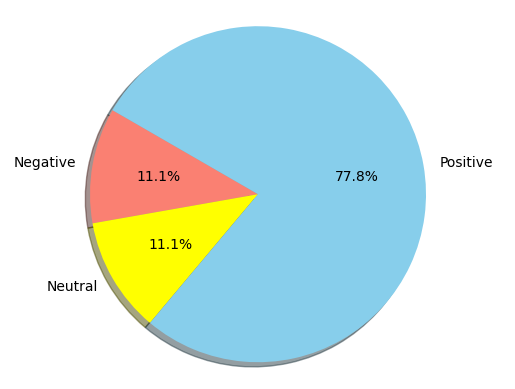

In [11]:
colors = ["salmon", "yellow", "skyblue"]
print("\n Polarity Analysis\n")

plt.pie(values, labels=labels, colors = colors, autopct="%1.1f%%",
        shadow=True, startangle = 150)

plt.axis("equal")
plt.show()

SUBJECTIVITY ANALYSIS

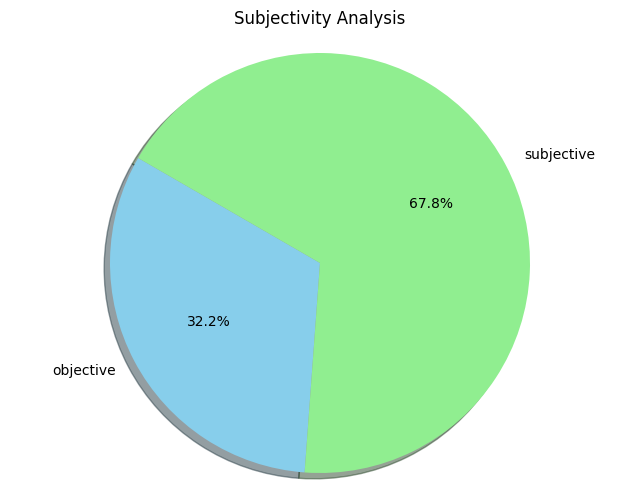

In [12]:
labels_subjectivity = ['objective', 'subjective']
value_subjectivity = [len(objective_words), len(subjective_words)]
colors_subjectivity = ['skyblue', 'lightgreen']

plt.figure(figsize=(8,6))
plt.pie(value_subjectivity, labels = labels_subjectivity, colors = colors_subjectivity, autopct = '%1.1f%%', shadow = True, startangle = 150)
plt.title("Subjectivity Analysis")
plt.axis("Equal")
plt.show()

AFTER DOING SENTIMENT ANALYSIS ON EACH LINE, FOR FURTHER ANALYSIS SENTIMENT ANALYSIS IS DONE ON DIFFERENT ASPECTS LIKE - PLOT, CHARACTERS, THEMES, DIRECTION, CINEMATOGRAPHY AND SPEACIAL AFFECTS

In [13]:
aspects = {
    'plot': "The plot of \"Inception\" revolves around Cobb's attempt to pull off the ultimate heist: inception. Instead of stealing an idea, Cobb and his team must plant one in the mind of Robert Fischer (Cillian Murphy), the heir to a vast corporate empire. This mission is offered to Cobb by Saito (Ken Watanabe), a powerful businessman who promises to clear Cobb's criminal record in exchange for successfully planting the idea. Cobb assembles a team of specialists, including Arthur (Joseph Gordon-Levitt), Eames (Tom Hardy), Ariadne (Elliot Page), and Yusuf (Dileep Rao), to execute this intricate plan.",
    'characters': "Dom Cobb, a skilled  thief who specializes in the art of extraction, a process by which he enters the dreams of his targets  to steal valuable secrets from their subconscious. Cobb is haunted by the death of his wife, Mal (played by Marion Cotillard), and is estranged from his children. His skills have made him a hot commodity in the world of corporate espionage, but they have also cost him dearly, making him a fugitive from the law. Ariadne, the architect of the dreamscapes, plays a crucial role in helping Cobb confront and understand his psychological struggles.",
    'direction': "\"Inception\" is a 2010 science fiction film directed and written by Christopher Nolan, known for his complex and mind-bending narratives. Christopher Nolan's meticulous direction, combined with outstanding performances from the cast, a gripping narrative, and groundbreaking special effects, makes  \"Inception\" a cinematic masterpiece. The film's climax is a tour de force of editing, special effects, and storytelling. As the team navigates  the perilous layers of the dream, the boundaries between dreams and reality blur, leading to a  series of thrilling and emotionally charged sequences. The iconic ending, with the spinning top,  leaves the audience questioning the nature of reality and Cobb's ultimate fate, making it one of the  most discussed and analyzed conclusions in modern cinema. \"Inception\" is not just a science fiction heist film; it is a profound exploration of the human mind  and the nature of reality.",
    'themes': " At its core, \"Inception\" is also a deeply emotional story about Cobb's journey to redemption and  self-forgiveness. Cobb's guilt over Mal's death and his longing to return to his children are central to  his character arc. Mal's presence in Cobb's subconscious acts as both a reminder of his past  mistakes and an obstacle he must overcome to succeed in his mission. \"Inception\" is not just a science fiction heist film; it is a profound exploration of the human mind and the nature of reality. Christopher Nolan's meticulous direction, combined with outstanding performances from the cast, a gripping narrative, and groundbreaking special effects, makes \"Inception\" a cinematic masterpiece. Its themes of loss, redemption, and the power of ideas continue to resonate with audiences, cementing its place as one of the most innovative and thought-provoking films of the 21st century.",
    'cinematography': "The film's dreamscapes are beautifully rendered, from the rainy streets of a city to a luxurious hotel and a snowy fortress, each reflecting the psychological states and strategies of the characters involved.",
    'special_effects': "The film's climax is a tour de force of editing, special effects, and storytelling. As the team navigates the perilous layers of the dream, the boundaries between dreams and reality blur, leading to a series of thrilling and emotionally charged sequences."

}

preprocessed_aspects = {aspect: preprocess_text(text) for aspect, text in aspects.items()}

In [14]:
aspect_sentiments = {}
for aspect, text in preprocessed_aspects.items():
    sentiment = TextBlob(text).sentiment
    aspect_sentiments[aspect] = sentiment
    print(f"Aspect: {aspect}")
    print(f"Text: {text}")
    print(f"Sentiment: Polarity={sentiment.polarity:.2f}, Subjectivity={sentiment.subjectivity:.2f}\n")

Aspect: plot
Text: plot `` inception '' revolves around cobb 's attempt pull ultimate heist : inception . instead stealing idea , cobb team must plant one mind robert fischer ( cillian murphy ) , heir vast corporate empire . mission offered cobb saito ( ken watanabe ) , powerful businessman promise clear cobb 's criminal record exchange successfully planting idea . cobb assembles team specialist , including arthur ( joseph gordon-levitt ) , eames ( tom hardy ) , ariadne ( elliot page ) , yusuf ( dileep rao ) , execute intricate plan .
Sentiment: Polarity=0.11, Subjectivity=0.70

Aspect: characters
Text: dom cobb , skilled thief specializes art extraction , process enters dream target steal valuable secret subconscious . cobb haunted death wife , mal ( played marion cotillard ) , estranged child . skill made hot commodity world corporate espionage , also cost dearly , making fugitive law . ariadne , architect dreamscapes , play crucial role helping cobb confront understand psychological

THE ABOVE ANALYSIS IS VISUALIZED WITH BAR GRAPH FOR BETTER UNDERSTANDING

<ipython-input-15-35431ef25bb8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aspect_names, y=polarities, palette='viridis')
<ipython-input-15-35431ef25bb8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aspect_names, y=subjectivities, palette='viridis')


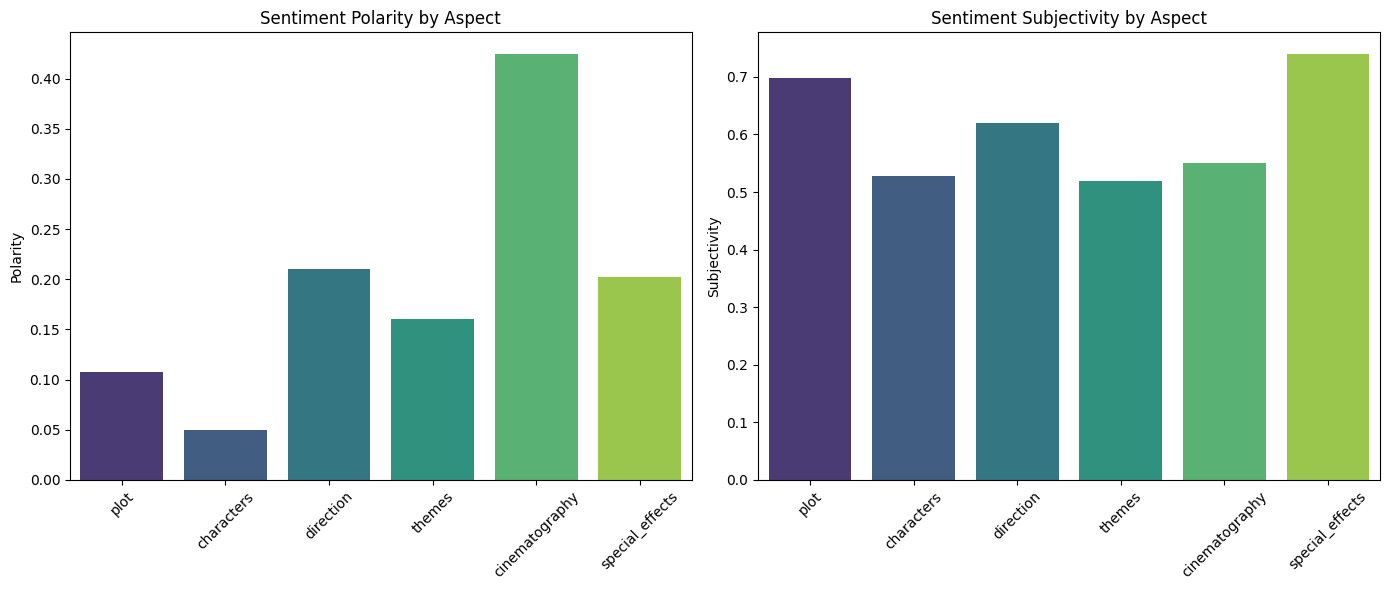

In [15]:
aspect_names = list(aspect_sentiments.keys())
polarities = [aspect_sentiments[aspect].polarity for aspect in aspect_names]
subjectivities = [aspect_sentiments[aspect].subjectivity for aspect in aspect_names]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=aspect_names, y=polarities, palette='viridis')
plt.title('Sentiment Polarity by Aspect')
plt.ylabel('Polarity')
plt.xticks(rotation=45)



plt.subplot(1, 2, 2)
sns.barplot(x=aspect_names, y=subjectivities, palette='viridis')
plt.title('Sentiment Subjectivity by Aspect')
plt.ylabel('Subjectivity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

WORDCLOUD OF THE POSITIVE SENTIMENTS

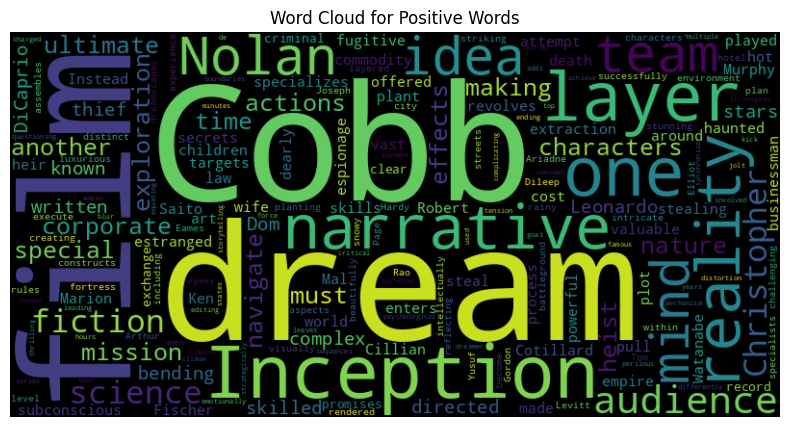

In [16]:
wordcloud_pos = WordCloud(width=800, height=400, background_color='black').generate(' '.join(positive_review))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation = 'bilinear')
plt.title('Word Cloud for Positive Words')
plt.axis('off')
plt.show()

WORDCLOUD OF THE NEGATIVE SENTIMENTS

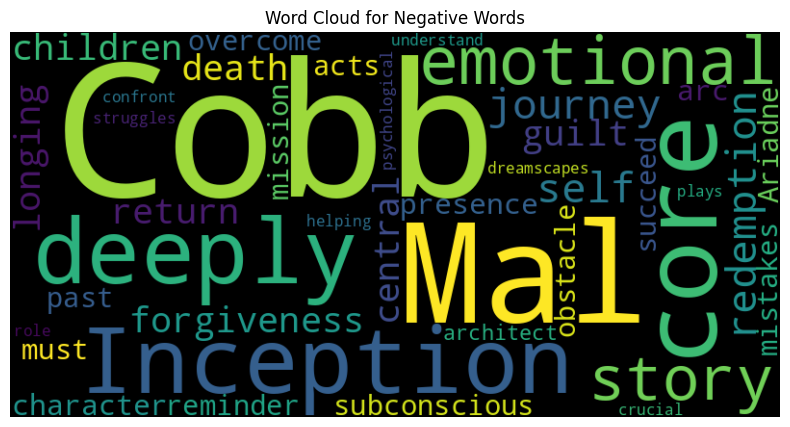

In [17]:
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(' '.join(negative_review))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation = 'bilinear')
plt.title('Word Cloud for Negative Words')
plt.axis('off')
plt.show()

From the above analysis it can be noted that the review of inception movie is mostly positive with 77.8% also the review made mainly focuses on subjective or personal opinion rather than actual facts so the review can be changed a bit to add more actual facts so that better analysis could be made regarding this. On further breaking down the sentiment analysis on different aspects of the movie, we did analysis on aspects like plot, character, directions, themes, cinematography and speacial-effects. On doing the analysis it has been found positive polarity for all these aspects, so we can say that the movie has done well on all aspects. Characters has a little less positive polarity, thus it can be said more focus on character development should be put. Also the plot seems to have less positive polarity, it can be taken as an understanding that the movie is not about something very positive, which is actually true for Inception. Cinematography, special effects and direction having high polarity portrays that editing, direction work, cinema words were done to its best, making the movie a success. Another very important thing to note is that many of these review is subjective or we can say the review's opinion rather than actually facts (since most of the aspects subjectivity is more than 0.5). Character, themes and cinematography of the movie is at a marginal position of subjectivity and objectivity. Overall it can be said the movie has recevied positive feedback from the audience, some aspects can be made strong though.